In [384]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_absolute_error
# from sklearn import linear_model

import math
from scipy import stats

sns.set()

random_state = 123_456
np.random.seed(random_state)

In [385]:
df = pd.read_csv('fuel-prices/all_features_combined.csv', index_col='date', dtype={'price': np.int32, 
                 'tapis_oil_price': np.int32, 'national_avg_price': np.int32}, parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.shape[0], freq='D'), inplace=True, verify_integrity=True)

In [386]:
features = ['price']

In [387]:
ma_days = 8
look_back = int(ma_days / 2 * -1)

df = df[df.index >= '2019-06-24'][features]
# df = df[(df.index >= '2019-02-24') & (df.index <= '2019-09-24')][features]
# df.drop(df[df.index > '2019-12-30'].index, inplace=True)
# df['price_t_minus_1'] = df.price.shift(1)

df['ma'] = df.rolling(ma_days).mean().round()
df['ma_t_minus_8'] = df.ma.shift(look_back + 1)
df.dropna(inplace=True)
# df.ma_t_minus_8 = df.ma_t_minus_8.astype('int')
del df['ma']
# df.price_t_minus_1 = df.price_t_minus_1.astype('int')
# df.price_t_minus_2 = df.price_t_minus_2.astype('int')

df

price  ma_t_minus_8
2019-07-01   1548        1549.0
2019-07-02   1519        1544.0
2019-07-03   1535        1540.0
2019-07-04   1555        1548.0
2019-07-05   1558        1558.0
...           ...           ...
2019-12-24   1657        1664.0
2019-12-25   1626        1645.0
2019-12-26   1605        1630.0
2019-12-27   1608        1619.0
2019-12-28   1589        1609.0

[181 rows x 2 columns]

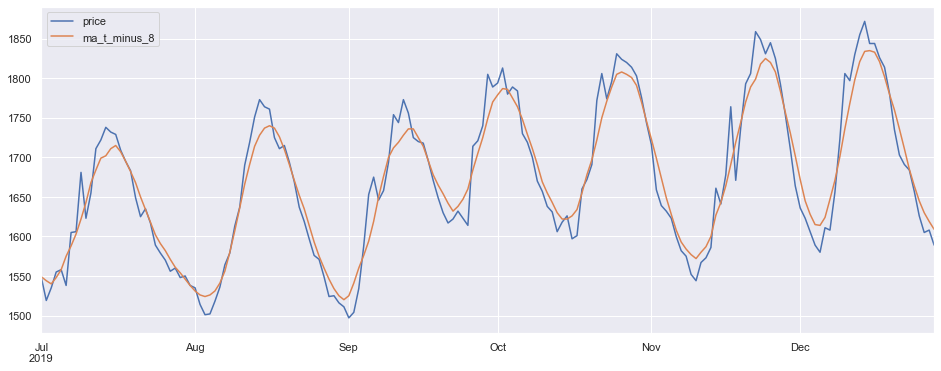

In [388]:
df.plot(figsize = (16, 6))

In [389]:
# df[(df.index > '2019-12-10') & (df.index < '2019-12-20')].ma_t_minus_8

In [390]:
df_rev = df[::-1].copy()
# df_rev.reindex(index=df_rev.index[::-1])
df_rev

price  ma_t_minus_8
2019-12-28   1589        1609.0
2019-12-27   1608        1619.0
2019-12-26   1605        1630.0
2019-12-25   1626        1645.0
2019-12-24   1657        1664.0
...           ...           ...
2019-07-05   1558        1558.0
2019-07-04   1555        1548.0
2019-07-03   1535        1540.0
2019-07-02   1519        1544.0
2019-07-01   1548        1549.0

[181 rows x 2 columns]

In [391]:
looking_for_max = True
last_max = df_rev.iloc[0].ma_t_minus_8
last_max_date = df_rev[:1].index
last_min = 2000
last_min_date = None
list_of_dates = list()

for index, value in df_rev.ma_t_minus_8.items():
    if looking_for_max:
        if value < last_max:
            print(last_max_date, last_max, 'Max')
            last_max = -1
            if last_min_date: list_of_dates.append((last_min_date - last_max_date).days)
            looking_for_max = False
        else:
            last_max = value
            last_max_date = index
    else:
        if value > last_min:
            print(last_min_date, last_min, 'Min')
            list_of_dates.append((last_max_date - last_min_date).days)
            last_min = 2000
            looking_for_max = True
        else:
            last_min = value
            last_min_date = index
#     print(last_max, value, last_max_date)
#     break

2019-12-15 00:00:00 1835.0 Max
2019-12-05 00:00:00 1614.0 Min
2019-11-24 00:00:00 1825.0 Max
2019-11-10 00:00:00 1572.0 Min
2019-10-26 00:00:00 1808.0 Max
2019-10-14 00:00:00 1622.0 Min
2019-10-02 00:00:00 1787.0 Max
2019-09-22 00:00:00 1632.0 Min
2019-09-13 00:00:00 1736.0 Max
2019-08-31 00:00:00 1520.0 Min
2019-08-16 00:00:00 1740.0 Max
2019-08-03 00:00:00 1524.0 Min
2019-07-16 00:00:00 1715.0 Max
2019-07-03 00:00:00 1540.0 Min


In [392]:
list_of_dates

[10, 11, 14, 15, 12, 12, 10, 9, 13, 15, 13, 18, 13]

In [393]:
list_of_dates = np.array(list_of_dates)

In [394]:
stats.describe(list_of_dates)

DescribeResult(nobs=13, minmax=(9, 18), mean=12.692307692307692, variance=6.064102564102565, skewness=0.47366963083101454, kurtosis=-0.16961368441283842)

In [395]:
# 3 years = 22 days
# 2 years = 22 days
# 1 year  = 24 days

In [396]:
(44+24)/3

22.666666666666668

In [397]:
stats.trim_mean(list_of_dates, 0.1)

12.545454545454545

In [398]:
# 2017 = 23
# 2018 = 21
# 2019 = 27
(23+21+27)/3

23.666666666666668